In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\User\PyCharmMiscProject\Datasets\StudentsPerformance.csv")
df.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [19]:
df.isna().sum()
df.duplicated().sum()
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

We might need to take the target variable to predict the continuous regression,
Right now we have "math score, reading score, writing score" we take either one or we might make a new column result and make it a target variable

In [27]:
# df["result"]

df["Result"] = df["math score"] + df["reading score"] + df["writing score"]
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Result
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


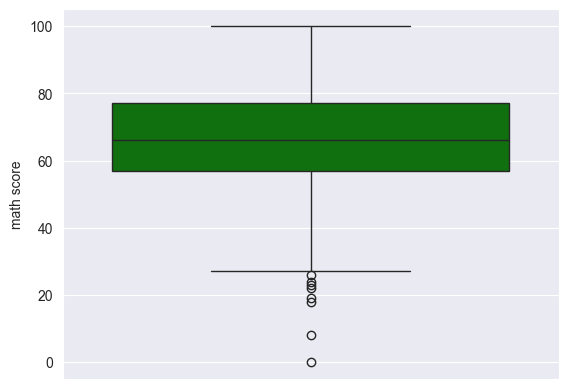

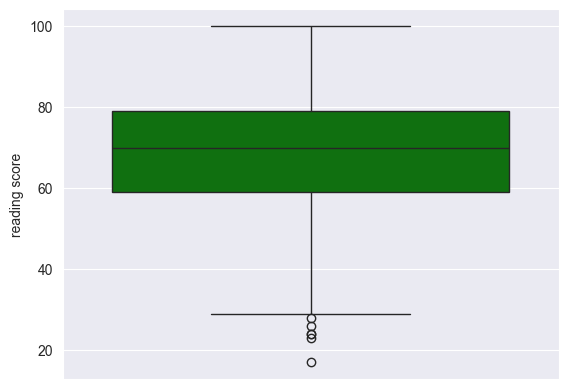

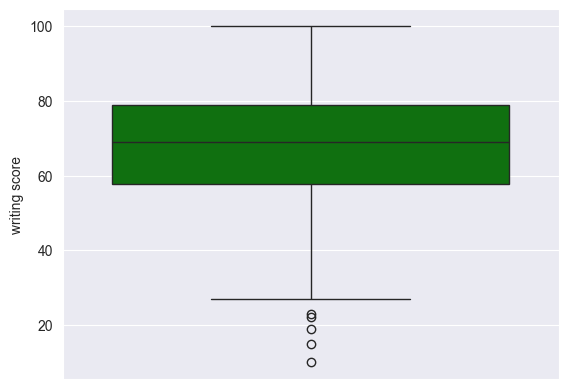

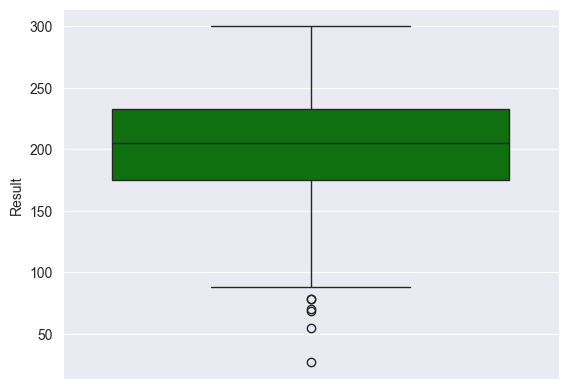

       math score  reading score  writing score       Result
count  1000.00000    1000.000000    1000.000000  1000.000000
mean     66.08900      69.169000      68.054000   203.312000
std      15.16308      14.600192      15.195657    42.771978
min       0.00000      17.000000      10.000000    27.000000
25%      57.00000      59.000000      57.750000   175.000000
50%      66.00000      70.000000      69.000000   205.000000
75%      77.00000      79.000000      79.000000   233.000000
max     100.00000     100.000000     100.000000   300.000000


In [29]:
for col in df.columns:
    if df[col].dtypes != "object":
        sns.boxplot(df[col], color= "green")
        plt.show()
print(df.describe())

The Score might be real, so no need to remove any of the outliers

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Result
0,0,1,1,1,1,52,44,50,118
1,0,2,4,1,0,49,62,64,147
2,0,1,3,1,1,70,67,69,178
3,1,0,0,0,1,27,29,20,48
4,1,2,4,1,1,56,50,51,129
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,68,70,71,182
996,1,2,2,0,1,42,27,31,72
997,0,2,2,0,0,39,43,41,95
998,0,3,4,1,0,48,50,53,123


In [35]:
x = df['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score',
       'writing score']
y = df['result']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

KeyError: ('gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading score', 'writing score')